# Data - California House

## Content:
### 1. Business Problem Understanding
### 2. Data Understanding
### 3. Data Preprocessing
### 4. Modeling
### 5. Conclusion
### 6. Recommendations

# Business Problem Understanding

### Context

Pasar properti, atau biasa juga disebut "Real Estate Market", adalah pasar yang melibatkan jual beli properti, baik itu rumah, apartemen, tanah, maupun bangunan komersial. Pasar ini sangat dinamis dan dipengaruhi oleh berbagai faktor seperti lokasi, kondisi ekonomi, suku bunga, dan permintaan serta penawaran. Sensus pasar perumahan sering dilakukan di beberapa negara bagian di Amerika Serikat sebagai bentuk transparansi pasar. Dengan adanya sensus-sensus tersebut, ada harapan agar pembeli dan penjual properti dapat lebih menawarkan dan menerima harga-harga yang adil sesuai dengan faktor yang telah disebut. 

Data yang akan kami proses berasal dari sensus perumahan di negara bagian California yang dilakukan pada tahun 1990. Data tersebut juga pernah menjadi sampel untuk jurnal ilmiah 'Science Direct' dalam artikel 'Statistics and Probability Letter: Sparse Spatial Autoregressions' yang dipublikasikan pada tahun 1997. 

### Problem Statement

Sebagai calon pembeli rumah, salah satu tantangan terbesar adalah mencari harga yang adil untuk sebuah properti. Faktor-faktor seperti jumlah kamar, populasi dalam perumahan, dan kedekatan dengan fasilitas publik pastinya menjadi pertimbangan dalam pemilihan properti, yang juga memiliki efek masing-masing terhadap harga yang ditawarkan. Dengan lebih memahami efek-efek dari faktor-faktor tersebut, calon pembeli rumah dapat memiliki daya negosiasi dalam proses tawar-menawar harga properti. 

Selain calon pembeli rumah, perusahaan-perusahaan khusus investasi properti memerlukan metode kuantitatif untuk membimbing seleksi investasi mereka. Sama seperti calon pembeli rumah, perusahaan-perusahaan ini harus mengerti efek-efek dari berbagai faktor pada nilai jual rumah. 

### Goals

Projek ini bertujuan untuk memberikan calon pembeli rumah di California sebuah 'tool' yang dapat memberikan estimasi harga properti yang berada di sebuah perumahan dengan metrik-metrik khusus sesuai dengan sensus perumahan California pada tahun 1990. Dengan tool ini, pembeli dan penjual rumah di negara bagian California dapat lebih mengerti harga properti sesuai dengan karakteristik perumahannya, sehingga efisiensi real estate market di California akan menjadi lebih kuat.

### Analytic Approach

Untuk mencapai goal tersebut, kami harus melakukan exploratory data analysis. Projek ini akan mengikuti workflow sebagai berikut:

Dimulai dengan membersihkan data, dan menghapus entry dengan data kosong atau mengisinya dengan metode regression imputation sesuai dengan keperluan. Dilanjutkan dengan memperlihatkan korelasi antara variabel-variabel exploratory, sekalian untuk mengecek apabila adanya overlapping exploratory power dalam bentuk multuicollinearity. Setelah mengecek asumsi-asumsi model untuk memastikan keandalan model, kami melanjutkan dengan melakukan multiple regression method.

### Evaluation metrics

Metrik-metrik seperti MAE, RMSE, dan MSE akan digunakan untuk menunjukkan kekuatan prediksi dari model ini. Model ini memiliki kekuatan prediktif yang sesuai dengan rendahnya metrtik-metrik tersebut. Selain itu, r-squared dan adjusted r-squared juga digunakan sebagai goodness of fit metrics pada model ini terhadap training data yang diberikan. 

# Data Understanding

Training data diambil dari sensus pasar properti di California pada tahun 1990. Setiap baris data merepresentasikan satu perumahan (neighborhood) beserta penghuni-penghuninya. 

### Data Dictionary

| Variable | Attribute | Data Type | Description |
|-----|----------|----------|----------|
| 1   | longitude     | Float     | Posisi sesuai garis bujur     |
| 2   | latitude    | Float     | Posisi sesuai garis lintang     |
| 3   | housing_median_age    | Integer     | Usia median dari populasi perumahan     |
| 4   | total_rooms     | Integer     | Total jumlah kamar     |
| 5   | total_bedrooms     | Integer     | Total jumlah kamar tidur     |
| 6   | population     | Integer     | Populasi perumahan     |
| 7   | households     | Integer     | Total jumlah 'social unit' yang tinggal di satu rumah    |
| 8   | median income     | Integer     | Median pemasukan per tahun satu household     |
| 9   | ocean_proximity     | Object     | Kedekatan dengan laut     |
| 10  | median_house_value     | Integer     | Harga median rumah dalam perumahan     |

# Data Preprocessing

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Cleaning

In [ ]:
## Check for duplicates in rows 
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

# Tidak ada duplicated rows

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [ ]:
### Check missing values per column
has_missing = df.isna().any().any()
print(f"DataFrame has missing values: {has_missing}")

columns_with_missing = df.isna().any()
print(columns_with_missing)

missing_percent = df.isna().mean() * 100
print(missing_percent)

# Diketemukan missing values dalam fitur 'total_bedrooms'
missing_count = df['total_bedrooms'].isna().sum()
print(f"Number of missing values in 'total_bedrooms': {missing_count}")

DataFrame has missing values: True
longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64
Number of missing values in 'total_bedrooms': 207


In [ ]:
### Melihat apakah Regression Imputation bisa digunakan untuk fill in missing values dalam 'total_bedrooms'

## Correlation Matrix 
## High correlation = ada hubungan linear antara fitur-fitur tersebut

columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
           'total_bedrooms', 'population', 'households', 'median_income', 
           'median_house_value']

corr_matrix = df[columns].corr()
print(corr_matrix)

# 'total_bedrooms' mempunya korelasi yang tinggi dan linear dengan 'total_rooms': r = 0.93 (high positive correlation)
# Artinya, missing values dalam 'total_bedrooms' bisa diestimasi lebih akurat lewat regression imputation dengan adanya hubungan linear yang signifikan antara 'total_bedrooms'
# dan 'total_rooms'

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [ ]:
### Fill in missing values in 'total_bedrooms' with Regression Imputation
from sklearn.linear_model import LinearRegression

missing_mask = df['total_bedrooms'].isnull()
known_data = df[~missing_mask]
missing_data = df[missing_mask]

X_known = known_data[['total_rooms']].values
y_known = known_data['total_bedrooms'].values

regressor = LinearRegression()
regressor.fit(X_known, y_known)

X_missing = missing_data[['total_rooms']].values
predicted_values = regressor.predict(X_missing)

df.loc[missing_mask, 'total_bedrooms'] = predicted_values

In [ ]:
missing_values = df.isna().sum()
print(missing_values)

# Tidak ada lagi missing values 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
### Check for null values
null_counts = df.isna().sum()
print(null_counts)

# Tidak ada null values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


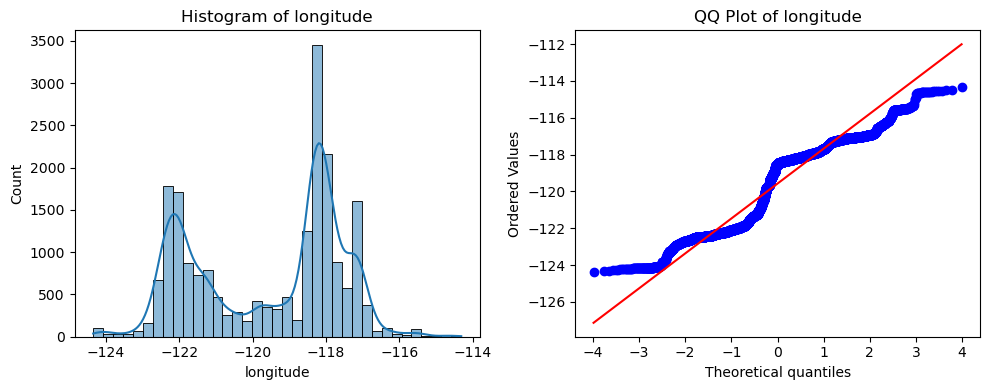

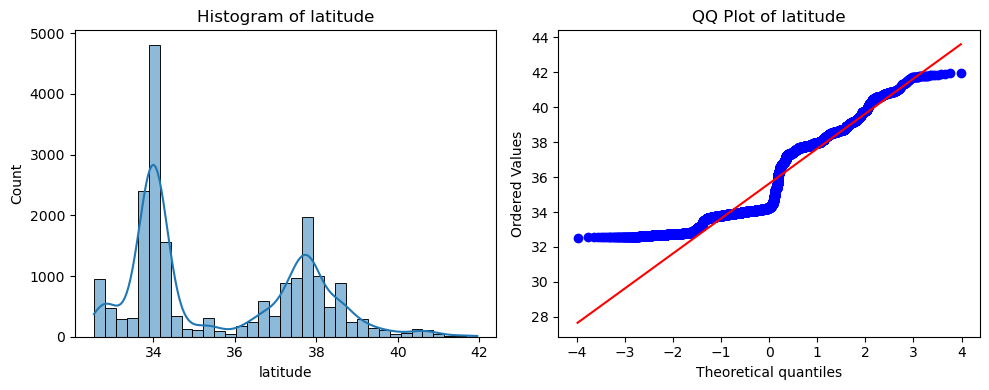

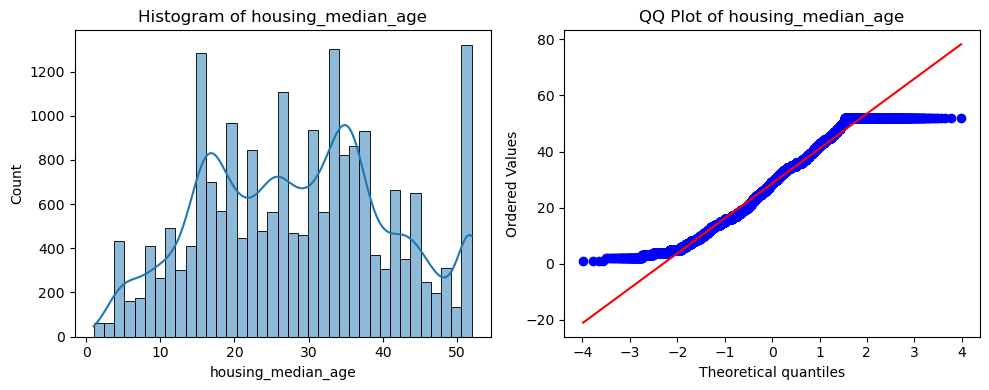

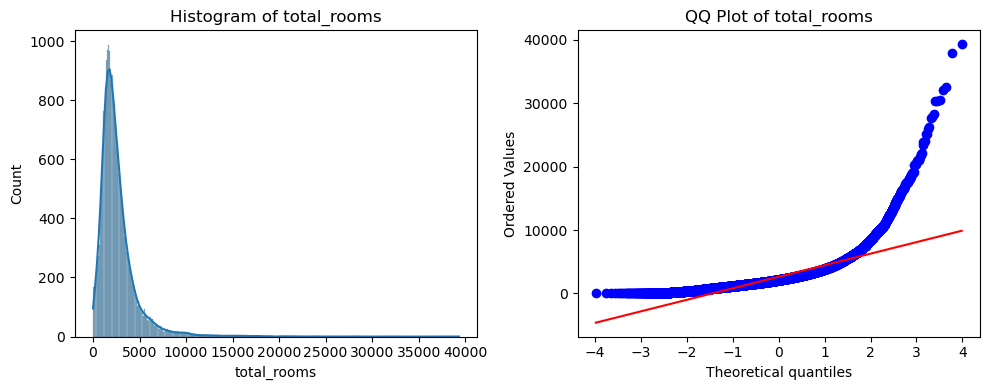

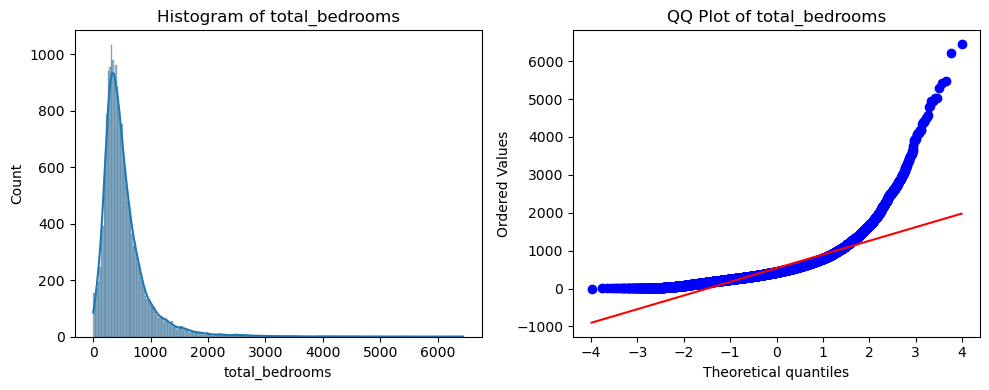

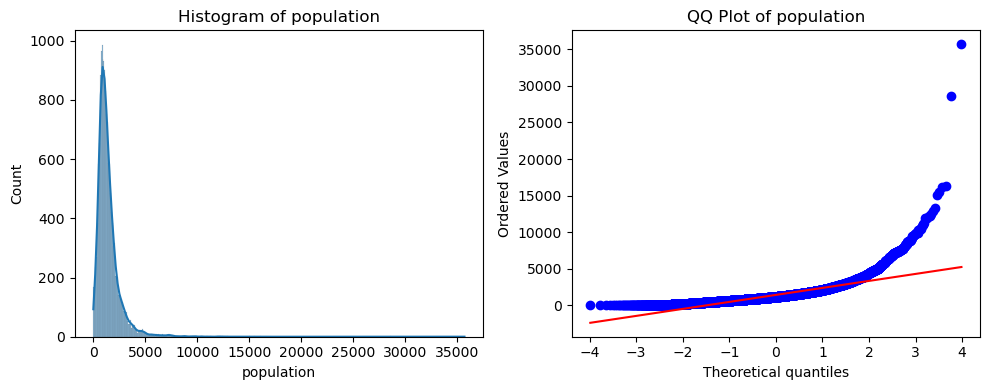

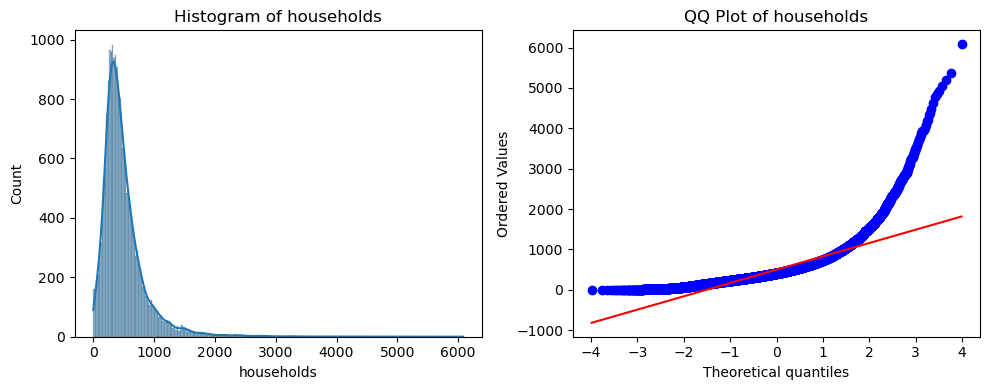

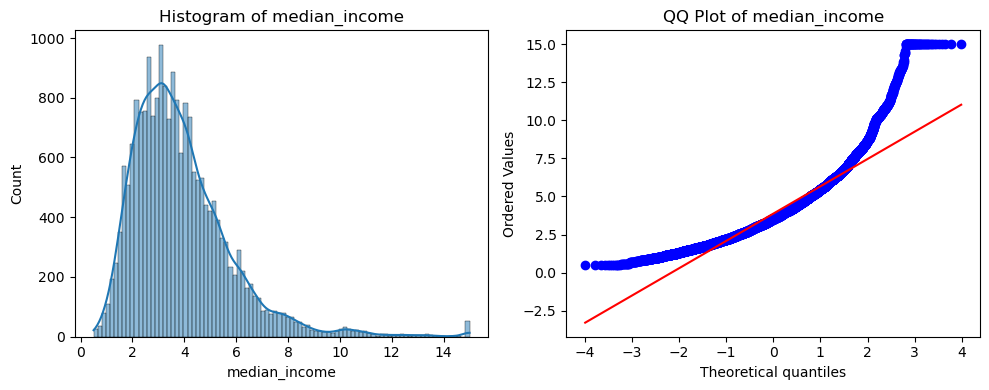

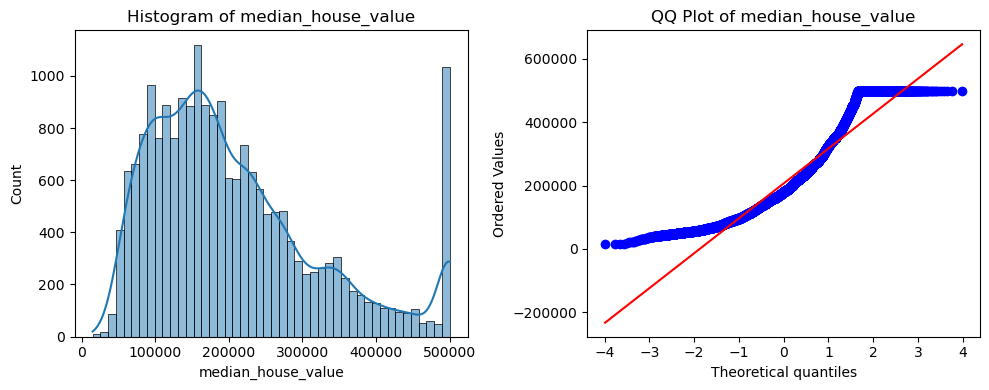

In [ ]:
### Check distribution for all continuous vairables 

from scipy import stats

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('ocean_proximity', errors='ignore') 

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], plot=plt)
    plt.title(f'QQ Plot of {col}')
    
    plt.tight_layout()
    plt.show()

# Semua continuous variables (variable selain 'ocean_proximity') menunjuki distrubusi yang tidak normal
# Karena ini berikutnya kita akan check dan handle outliers dalam semua variable numerik yang dipertimbangkan dengan domain knowledge dataset tersebut

In [ ]:
### Check outliers dalam fitur 'longitude'
## Outliers: outside range of -114.8 to -124.26
## Based on spatial data of California: 114°8′ W to 124°26′ W 
## (source: https://en.wikipedia.org/wiki/California)

lower_bound = -124.26
upper_bound = -114.8

out_of_range = ((df['longitude'] < lower_bound) | (df['longitude'] >= upper_bound))
count_out_of_range = out_of_range.sum()

print(f"Number of values outside range (-124.26, -114.8): {count_out_of_range}")
print(f"Percentage of values outside range: {count_out_of_range/len(df)*100:.2f}%")

Number of values outside range (-124.26, -114.8): 32
Percentage of values outside range: 0.16%


In [ ]:
### Delete rows with longitude outside range (-124.26, -114.8)
## Karena tidak terlalu banyak outliers dalam kolom 'longitude'= 22, bisa di delete rows dengan outliers tersebut 
lower_bound = -124.26
upper_bound = -114.8

in_range_mask = (df['longitude'] >= lower_bound) & (df['longitude'] <= upper_bound)
df = df.loc[in_range_mask].copy()  

print(f"Original shape: {df.shape}")
print(f"Number of rows deleted: {len(df) - df.shape[0]}")

Original shape: (20608, 10)
Number of rows deleted: 0


In [ ]:
lower_bound = -124.26
upper_bound = -114.8

out_of_range = ((df['longitude'] < lower_bound) | (df['longitude'] >= upper_bound))
count_out_of_range = out_of_range.sum()

print(f"Number of values outside range (-124.26, -114.8): {count_out_of_range}")
print(f"Percentage of values outside range: {count_out_of_range/len(df)*100:.2f}%")

# Sudah tidak ada outliers dalam fitur 'longitude'

Number of values outside range (-124.26, -114.8): 0
Percentage of values outside range: 0.00%


In [ ]:
### Delete then check outliers dalam fitur 'latitude'
## Outliers: outside range of (32.32 to 42)
## Based on spatial data of California: 32°32′ N to 42° N
## (source: https://en.wikipedia.org/wiki/California)

lower_bound, upper_bound = 32.32, 42

in_range_mask = (df['latitude'] >= lower_bound) & (df['latitude'] <= upper_bound)

df = df.loc[in_range_mask].copy()

df.reset_index(drop=True, inplace=True)

out_of_range = (df['latitude'] < lower_bound) | (df['latitude'] > upper_bound)
remaining_outliers = out_of_range.sum()

print(f"Rows remaining: {len(df)}")
print(f"Out-of-range values after deletion: {remaining_outliers}")

if remaining_outliers > 0:
    print("\nWarning: Unexpected outliers found:")
    print(df.loc[out_of_range, 'latitude'].describe())
else:
    print("Verification successful - no out-of-range values remain")

# Tidak ada outliers dalam fitur 'latitude'

Rows remaining: 20608
Out-of-range values after deletion: 0
Verification successful - no out-of-range values remain


In [ ]:
### Check for outliers in all columns with continuous variables (except 'ocean_proximity')
def count_outliers_iqr(data):
    """
    Count outliers using IQR method for all columns except those with index 8.
    
    Args:
        data: pandas DataFrame
        
    Returns:
        Series with column names as index and outlier counts as values
    """
    outlier_counts = pd.Series(index=data.columns, dtype=int)
    
    for col_idx, col in enumerate(data.columns):
        if col_idx in {8}:
            outlier_counts[col] = 0  
            continue
            
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        n_outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
        outlier_counts[col] = n_outliers
        
    return outlier_counts

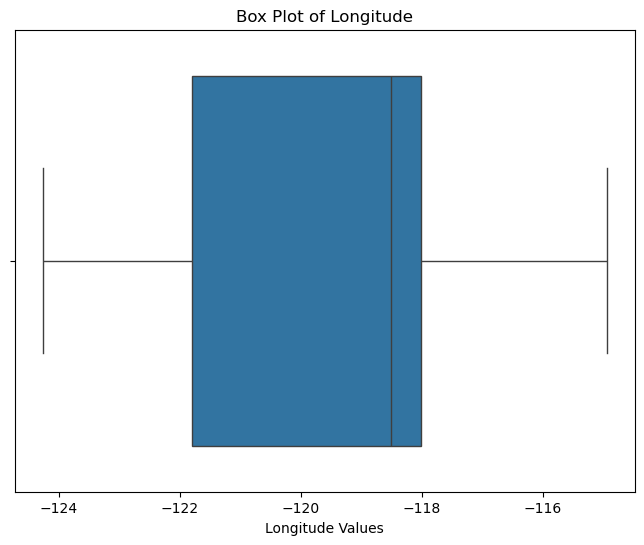

Q1 (25th percentile): -121.8
Q3 (75th percentile): -118.01
IQR: 3.789999999999992
Lower bound (Q1 - 1.5*IQR): -127.48499999999999
Upper bound (Q3 + 1.5*IQR): -112.32500000000002
Number of outliers: 0


In [ ]:
### Check outliers menggunakan boxplot - 'longitude'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['longitude'])
plt.title('Box Plot of Longitude')
plt.xlabel('Longitude Values')
plt.show()

Q1 = df['longitude'].quantile(0.25)
Q3 = df['longitude'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['longitude'] < lower_bound) | (df['longitude'] > upper_bound)]
num_outliers = len(outliers)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound}")
print(f"Number of outliers: {num_outliers}")

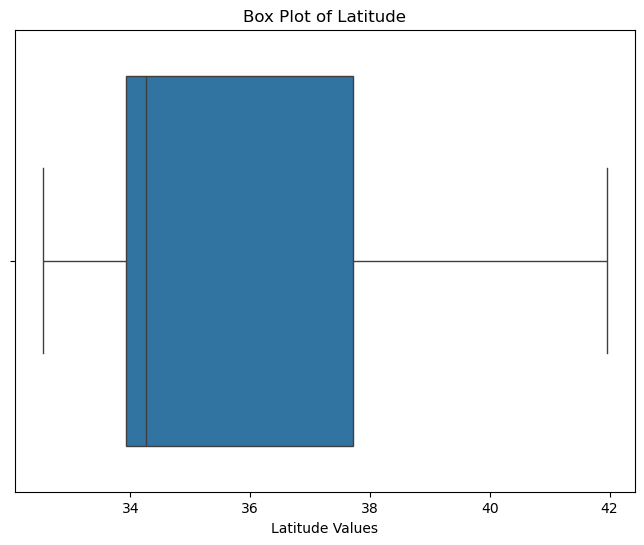

Q1 (25th percentile): 33.93
Q3 (75th percentile): 37.72
IQR (Q3 - Q1): 3.789999999999999
Lower bound (Q1 - 1.5*IQR): 28.245
Upper bound (Q3 + 1.5*IQR): 43.405
Number of outliers: 0


In [ ]:
### Check outliers menggunakan boxplot - 'latitude'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['latitude'])
plt.title('Box Plot of Latitude')
plt.xlabel('Latitude Values')
plt.show()

Q1 = df['latitude'].quantile(0.25)
Q3 = df['latitude'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['latitude'] < lower_bound) | (df['latitude'] > upper_bound)]
num_outliers = len(outliers)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound}")
print(f"Number of outliers: {num_outliers}")

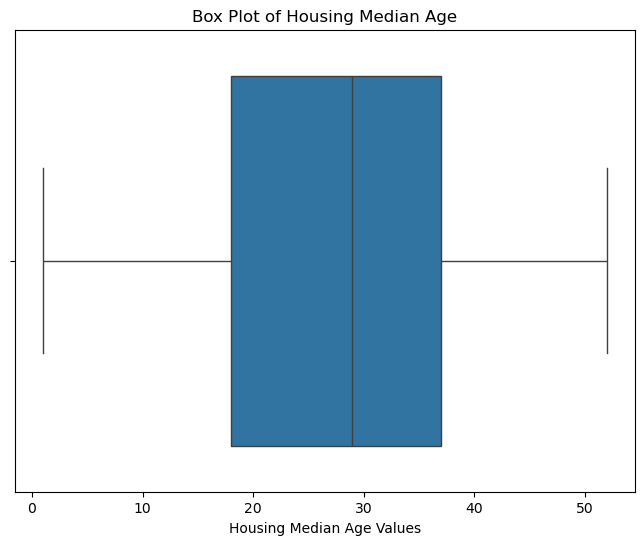

Q1 (25th percentile): 18.0
Q3 (75th percentile): 37.0
IQR (Q3 - Q1): 19.0
Lower bound (Q1 - 1.5*IQR): -10.5
Upper bound (Q3 + 1.5*IQR): 65.5
Number of outliers: 0


In [ ]:
### Check outliers menggunakan boxplot - 'housing_median_age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['housing_median_age'])
plt.title('Box Plot of Housing Median Age')
plt.xlabel('Housing Median Age Values')
plt.show()

Q1 = df['housing_median_age'].quantile(0.25)
Q3 = df['housing_median_age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['housing_median_age'] < lower_bound) | (df['housing_median_age'] > upper_bound)]
num_outliers = len(outliers)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound}")
print(f"Number of outliers: {num_outliers}")

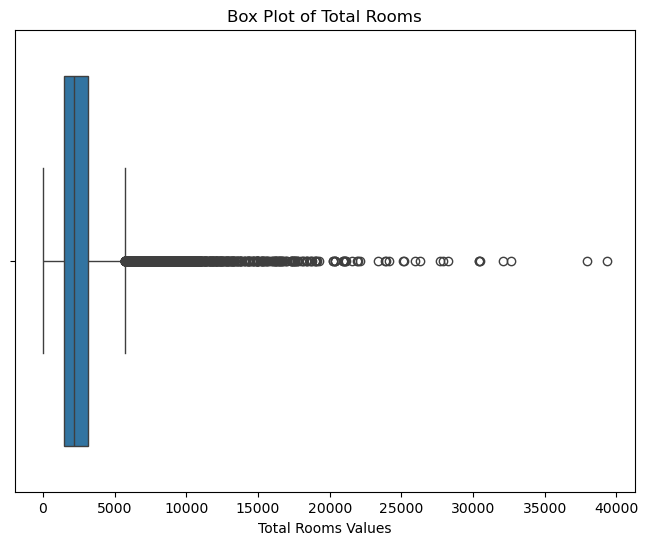

Q1 (25th percentile): 1448.0
Q3 (75th percentile): 3149.0
IQR (Q3 - Q1): 1701.0
Lower bound (Q1 - 1.5*IQR): -1103.5
Upper bound (Q3 + 1.5*IQR): 5700.5
Number of outliers: 1285


In [ ]:
### Check outliers menggunakan boxplot - 'total_rooms'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total_rooms'])
plt.title('Box Plot of Total Rooms')
plt.xlabel('Total Rooms Values')
plt.show()

Q1 = df['total_rooms'].quantile(0.25)
Q3 = df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_rooms'] < lower_bound) | (df['total_rooms'] > upper_bound)]
num_outliers = len(outliers)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound}")
print(f"Number of outliers: {num_outliers}")

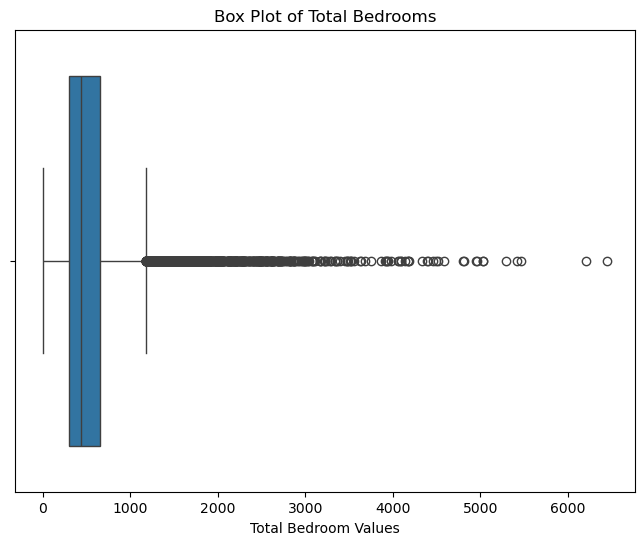

Q1 (25th percentile): 296.0
Q3 (75th percentile): 647.0
IQR (Q3 - Q1): 351.0
Lower bound (Q1 - 1.5*IQR): -230.5
Upper bound (Q3 + 1.5*IQR): 1173.5
Number of outliers: 1277


In [ ]:
### Check outliers menggunakan boxplot - 'total_bedrooms'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total_bedrooms'])
plt.title('Box Plot of Total Bedrooms')
plt.xlabel('Total Bedroom Values')
plt.show()

Q1 = df['total_bedrooms'].quantile(0.25)
Q3 = df['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_bedrooms'] < lower_bound) | (df['total_bedrooms'] > upper_bound)]
num_outliers = len(outliers)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound}")
print(f"Number of outliers: {num_outliers}")

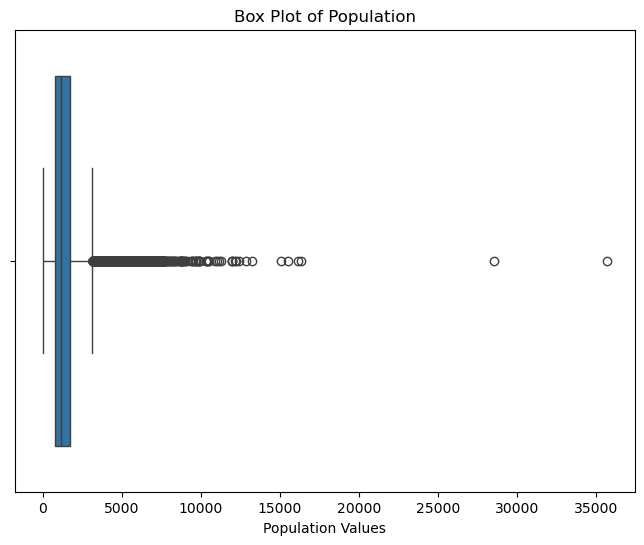

Q1 (25th percentile): 788.0
Q3 (75th percentile): 1726.0
IQR (Q3 - Q1): 938.0
Lower bound (Q1 - 1.5*IQR): -619.0
Upper bound (Q3 + 1.5*IQR): 3133.0
Number of outliers: 1195


In [ ]:
### Check outliers menggunakan boxplot - 'population'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['population'])
plt.title('Box Plot of Population')
plt.xlabel('Population Values')
plt.show()

Q1 = df['population'].quantile(0.25)
Q3 = df['population'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['population'] < lower_bound) | (df['population'] > upper_bound)]
num_outliers = len(outliers)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound}")
print(f"Number of outliers: {num_outliers}")

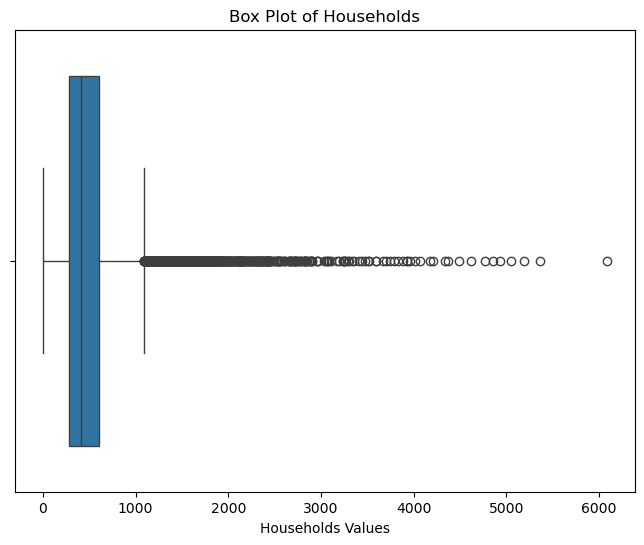

Q1 (25th percentile): 280.0
Q3 (75th percentile): 605.0
IQR (Q3 - Q1): 325.0
Lower bound (Q1 - 1.5*IQR): -207.5
Upper bound (Q3 + 1.5*IQR): 1092.5
Number of outliers: 1220


In [ ]:
### Check outliers menggunakan boxplot - 'households'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['households'])
plt.title('Box Plot of Households')
plt.xlabel('Households Values')
plt.show()

Q1 = df['households'].quantile(0.25)
Q3 = df['households'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['households'] < lower_bound) | (df['households'] > upper_bound)]
num_outliers = len(outliers)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound}")
print(f"Number of outliers: {num_outliers}")

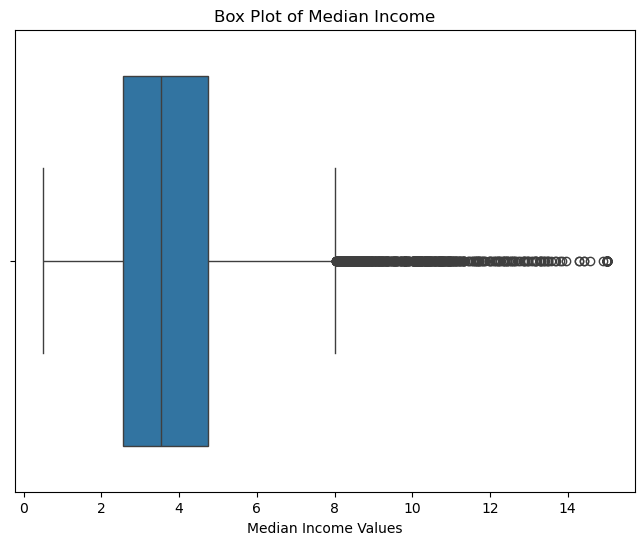

Q1 (25th percentile): 2.5660999999999996
Q3 (75th percentile): 4.746325
IQR (Q3 - Q1): 2.180225
Lower bound (Q1 - 1.5*IQR): -0.7042375000000005
Upper bound (Q3 + 1.5*IQR): 8.016662499999999
Number of outliers: 678


In [ ]:
### Check outliers menggunakan boxplot - 'median_income'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['median_income'])
plt.title('Box Plot of Median Income')
plt.xlabel('Median Income Values')
plt.show()

Q1 = df['median_income'].quantile(0.25)
Q3 = df['median_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['median_income'] < lower_bound) | (df['median_income'] > upper_bound)]
num_outliers = len(outliers)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound}")
print(f"Number of outliers: {num_outliers}")

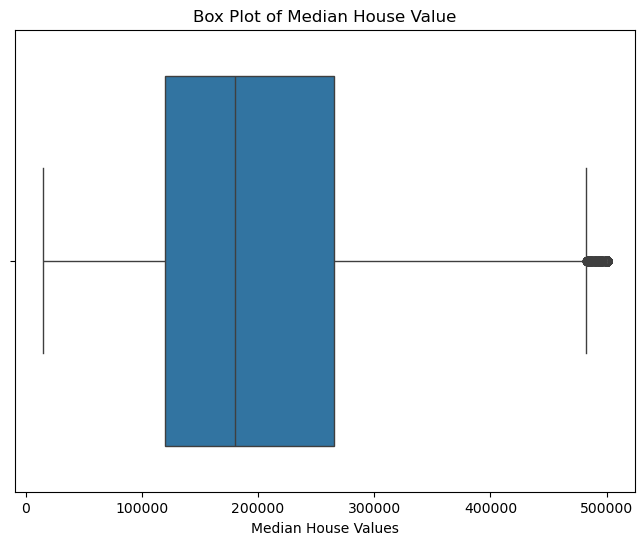

Q1 (25th percentile): 120000.0
Q3 (75th percentile): 265000.0
IQR (Q3 - Q1): 145000.0
Lower bound (Q1 - 1.5*IQR): -97500.0
Upper bound (Q3 + 1.5*IQR): 482500.0
Number of outliers: 1071


In [ ]:
### Check outliers menggunakan boxplot - 'median_house_value'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['median_house_value'])
plt.title('Box Plot of Median House Value')
plt.xlabel('Median House Values')
plt.show()

Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['median_house_value'] < lower_bound) | (df['median_house_value'] > upper_bound)]
num_outliers = len(outliers)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound}")
print(f"Number of outliers: {num_outliers}")

### Feature Engineering

In [ ]:
### Check descriptive statistics - Median House Value
df['median_house_value'].describe()

count     20608.000000
mean     207063.740344
std      115352.971161
min       14999.000000
25%      120000.000000
50%      179900.000000
75%      265000.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
# Limit atas (Q3) pada fitur 'median_house_value' adalah USD 2650000.0. Boxplot 'median_housing_value' mempunyai skew ke kanan, dimana artinya outliers berada di niali-nilai
# dimana median house value sangat tinggi.
# Oleh karena itu, data point median_housing_value yang di atas USD 264100.0 tidak akan dimasukkan dalam pemodelan. Ini akan saya taro sebagai salah satu limitasi dari
# model tersebut, dimana model tersebut hanya lebih tepat untuk digunakan untuk prediksi 
# harga properti real-world dalam sebuah area yang bervalue dalam range sekitar USD 120000.00 - USD 265000.00. Di luar range ini, prediksi model akan bias.

In [ ]:
### Delete semua data point yang memiliki nilai 'median_house_value' > 265000.00
mask = df['median_house_value'] > 265000.0

rows_deleted = mask.sum()
print(f"Number of rows to be deleted: {rows_deleted}")

df = df[~mask].copy()  
print(f"DataFrame shape after deletion: {df.shape}")

Number of rows to be deleted: 5188
DataFrame shape after deletion: (15420, 10)


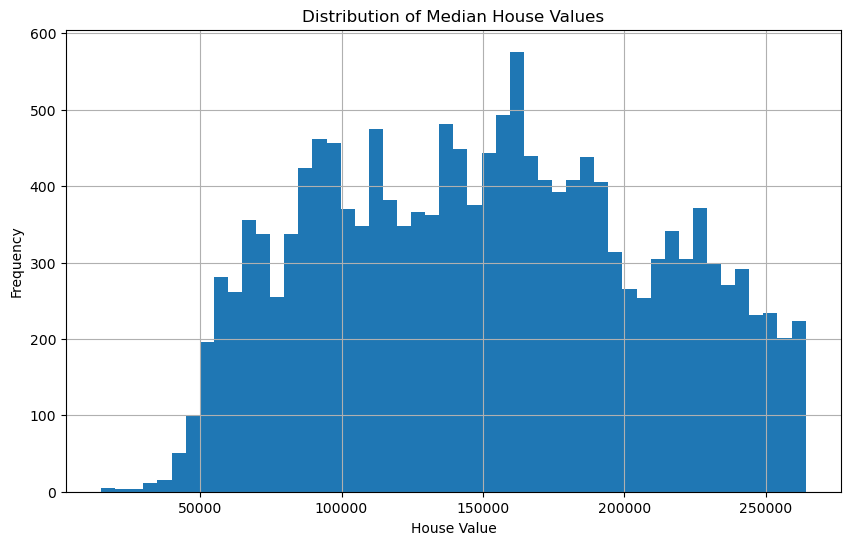

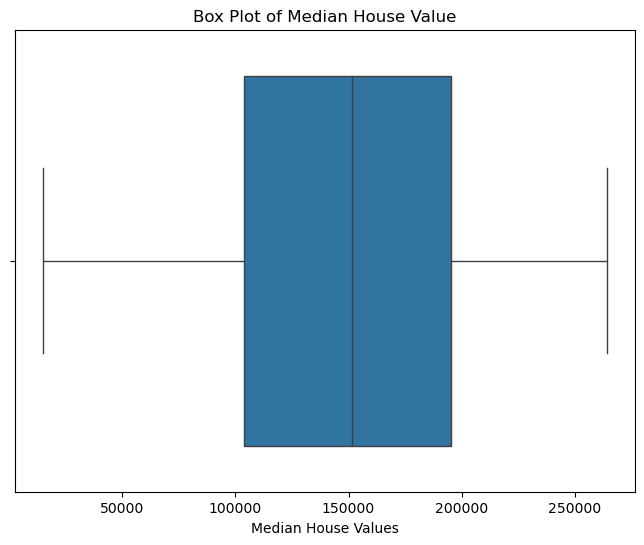

Q1 (25th percentile): 103600.0
Q3 (75th percentile): 195200.0
IQR (Q3 - Q1): 91600.0
Lower bound (Q1 - 1.5*IQR): -33800.0
Upper bound (Q3 + 1.5*IQR): 332600.0
Number of outliers: 0


In [ ]:
### Check distribusi seletah delete outliers 
df['median_house_value'].hist(bins=50, figsize=(10,6))
plt.title('Distribution of Median House Values')
plt.xlabel('House Value')
plt.ylabel('Frequency')
plt.show()

### Check outliers menggunakan boxplot - 'median_house_value'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['median_house_value'])
plt.title('Box Plot of Median House Value')
plt.xlabel('Median House Values')
plt.show()

Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['median_house_value'] < lower_bound) | (df['median_house_value'] > upper_bound)]
num_outliers = len(outliers)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound}")
print(f"Number of outliers: {num_outliers}")

# Distribusi median_house_value telah menjadi lebih normal
### Kita akan menggunakan variabel median_house_value sebagai target variable untuk memprediksi harga median rumah dalam sebuah area di California pada tahun 1990

In [ ]:
# Limitasi model yang saya ingin kontrol adalah limitasi dari kemampuan model untuk memprediksi variabel target. Oleh karena itu, banyak data point yang sudah di delete, dengan
# tradeoff model akan lebih akurat dengan memprediksi median house value. 
# Untuk mencegah overfitting, saya memilih untuk tidak delete outliers dalam variabel-variabel yang tidak akan menjadi target variabel untuk menjaga bias 
# dalam data fitur-fitur dengan target variable

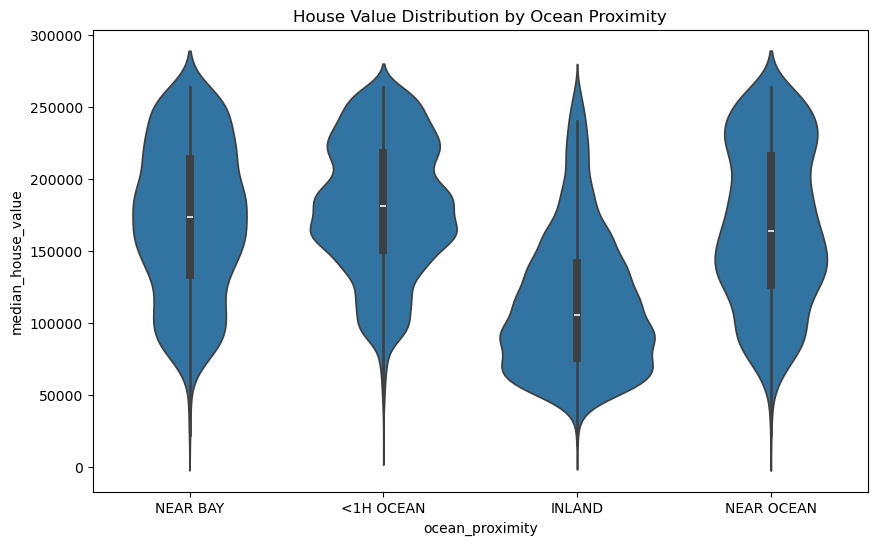

In [ ]:
### Check distribusi 'ocean_proximity' (variabel kategorik) dengan 'median_house_value'

plt.figure(figsize=(10, 6))
sns.violinplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('House Value Distribution by Ocean Proximity')
plt.show()

# Rata-rata, house value yang paling mahal berada di NEAR BAY dan <1H OCEAN
# Rata-ratam House value paling murah berada di INLAND
# House value paling bervariasi NEAR OCEAN
# Masuk akal, karena biasanya rumah dekat badan air khususnya laut, akan lebih mahal

In [ ]:
### One way ANOVA - Untuk melihat apakah berbeda ocean proximity mempengaruhi median house value secara signifikan

## Check ANOVA assumptions
# Normality
groups = [df[df['ocean_proximity'] == cat]['median_house_value'].dropna() 
          for cat in df['ocean_proximity'].unique()]

print("\nNormality Tests (Shapiro-Wilk):")
for cat, group in zip(df['ocean_proximity'].unique(), groups):
    stat, p = stats.shapiro(group)
    print(f"{cat:15s}: W = {stat:.3f}, p = {p:.4f} {'(Normal)' if p > 0.05 else '(*Not normal*)'}")

# Homogeneity of variances
stat, p = stats.levene(*groups)
print(f"\nLevene's Test for Homogeneity of Variance: W = {stat:.3f}, p = {p:.4f}")
print("Variances are equal across groups" if p > 0.05 else "Variances are NOT equal across groups")

## Normality assumption is violated, tapi tidak masalah karena N > 30
## Homogeneity of variances is violated, sehingga kita tidak akan menggunakan non-parametric test Kruskal-wallis


Normality Tests (Shapiro-Wilk):
NEAR BAY       : W = 0.975, p = 0.0000 (*Not normal*)
<1H OCEAN      : W = 0.983, p = 0.0000 (*Not normal*)
INLAND         : W = 0.944, p = 0.0000 (*Not normal*)
NEAR OCEAN     : W = 0.970, p = 0.0000 (*Not normal*)

Levene's Test for Homogeneity of Variance: W = 59.360, p = 0.0000
Variances are NOT equal across groups


In [ ]:
import scikit_posthocs as sp
from sklearn.datasets import load_iris

### Kruskal-Wallis & post-hoc test - ocean_proximity & median_house_value
groups = [df[df['ocean_proximity'] == category]['median_house_value'].dropna() 
          for category in df['ocean_proximity'].unique()]

h_stat, p_value = stats.kruskal(*groups)

print("Kruskal-Wallis Test Results:")
print(f"H-statistic: {h_stat:.3f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis - there are significant differences between groups")
else:
    print("\nConclusion: Fail to reject the null hypothesis - no significant differences between groups")

# Ada perbedaan yang signifikan antara berbeda ocean proximity (p < 0.05)

In [ ]:
### Standardizing all continuous variables - Standard Scaler
from sklearn.preprocessing import StandardScaler

continuous_cols = [col for col in df.columns if col != 'ocean_proximity']

scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])
print("Means after standardization (should be ~0):")
print(df[continuous_cols].mean().round(2))

print("\nStandard deviations after standardization (should be ~1):")
print(df[continuous_cols].std().round(2))

import joblib
joblib.dump(scaler, 'standard_scaler.pkl')

Means after standardization (should be ~0):
longitude            -0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms       -0.0
population           -0.0
households            0.0
median_income         0.0
median_house_value   -0.0
dtype: float64

Standard deviations after standardization (should be ~1):
longitude             1.0
latitude              1.0
housing_median_age    1.0
total_rooms           1.0
total_bedrooms        1.0
population            1.0
households            1.0
median_income         1.0
median_house_value    1.0
dtype: float64


['standard_scaler.pkl']

Correlation Matrix:
                    longitude  latitude  housing_median_age  total_rooms  \
longitude                1.00     -0.93               -0.07         0.06   
latitude                -0.93      1.00               -0.03        -0.03   
housing_median_age      -0.07     -0.03                1.00        -0.39   
total_rooms              0.06     -0.03               -0.39         1.00   
total_bedrooms           0.08     -0.07               -0.35         0.95   
population               0.12     -0.14               -0.28         0.85   
households               0.07     -0.08               -0.33         0.93   
median_income            0.04     -0.08               -0.23         0.21   
median_house_value       0.05     -0.24                0.00         0.13   

                    total_bedrooms  population  households  median_income  \
longitude                     0.08        0.12        0.07           0.04   
latitude                     -0.07       -0.14       -0.08       

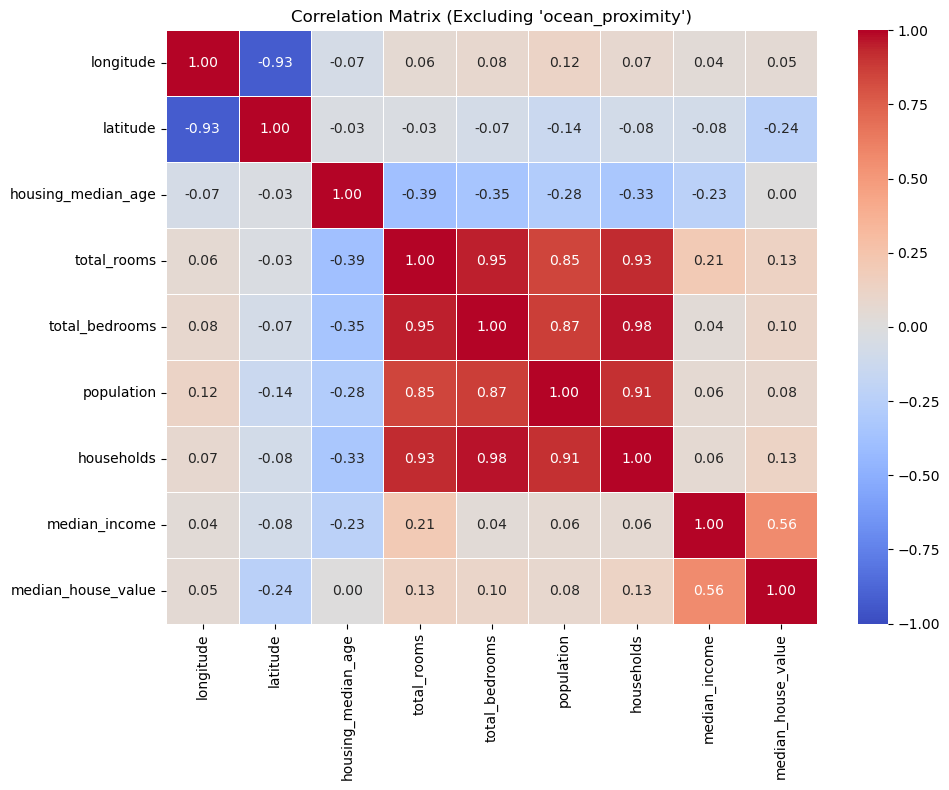

In [ ]:
### Correlation matrix - Melihat hubungan antara semua variabel continuous
corr_matrix = df.drop(columns=['ocean_proximity']).corr()

print("Correlation Matrix:")
print(corr_matrix.round(2))  

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            vmin=-1, 
            vmax=1,
            linewidths=0.5)
plt.title("Correlation Matrix (Excluding 'ocean_proximity')")
plt.tight_layout()
plt.show()

# median house value hanya mempunyai asosiasi positive yang moderate dengan median income (r = 0.57)
# kemudian median house value mempunya asosiasi negatif yang weak dengan latitude (r = -0.24)
# fitur-fitur berituknya yang mempunya asosiasi paling tinggi dengan median house value, walaupun sangat weak, adalah:
# total rooms (r = 0.13), households (r = 0.12), dan total bedrooms (r = 0.10) yang masuk akal karena berasosiasi tinggi positif dengan total rooms (r = 0.95)
# fitur ocean proximity akan kita gunakan karena adanya hubungan yang signifikan dengan median house value 

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7,-1.397051,0.966060,1.954776,0.290326,0.378938,-0.257835,0.418732,-0.119453,1.565206,NEAR BAY
8,-1.402101,0.966060,1.140196,0.027610,0.325944,-0.215289,0.279962,-0.961497,1.308990,NEAR BAY
9,-1.397051,0.966060,1.954776,0.503274,0.427113,0.084266,0.597531,0.343201,1.908571,NEAR BAY
11,-1.402101,0.970582,1.954776,0.481262,0.535509,0.043457,0.650904,0.002447,1.572178,NEAR BAY
12,-1.402101,0.970582,1.954776,-0.003016,-0.134136,-0.309063,-0.058956,-0.155902,1.078918,NEAR BAY


In [ ]:
### Check unique values from feature 'ocean_proximity'
unique_values = df['ocean_proximity'].unique()
print(unique_values)

# Dictionary - ocean_proximity
# INLAND: Far from the ocean
# NEAR BAY: Close to a bay
# <1H OCEAN: Within a max of one hour drive from the ocean
# NEAR OCEAN: Close to the ocean
# ISLAND: Property on an island instead of inland

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN']


In [ ]:
### Check the number of times each unique value appears from the feature 'ocean_proximity'

ocean_proximity_counts = df['ocean_proximity'].value_counts()
print(ocean_proximity_counts)

# Island muncul hanya 2 kali (outlier)

ocean_proximity
<1H OCEAN     6259
INLAND        6217
NEAR OCEAN    1609
NEAR BAY      1335
Name: count, dtype: int64


In [ ]:
### Delete all rows with the value 'ISLAND' from column 'ocean_proximity'

df = df[df['ocean_proximity'] != 'ISLAND']
print(df['ocean_proximity'].value_counts())

# Tidak ada lagi rows dengan value 'ISALND'

ocean_proximity
<1H OCEAN     6259
INLAND        6217
NEAR OCEAN    1609
NEAR BAY      1335
Name: count, dtype: int64


In [ ]:
### Encoding

In [ ]:
### One Hot Encoding - Change categorical variables to dummy variables from feature 'ocean_proximity'
data = {'ocean_proximity': ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']}

dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean')
df = pd.concat([df, dummies], axis=1)
print(df)
df.head()

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
11       -122.26     37.85                52.0       3503.0           752.0   
12       -122.26     37.85                52.0       2491.0           474.0   
...          ...       ...                 ...          ...             ...   
20603    -121.09     39.48                25.0       1665.0           374.0   
20604    -121.21     39.49                18.0        697.0           150.0   
20605    -121.22     39.43                17.0       2254.0           485.0   
20606    -121.32     39.43                18.0       1860.0           409.0   
20607    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_<1H OCEAN,ocean_INLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,False,False,True,False
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,False,False,True,False
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,False,False,True,False
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,False,False,True,False
12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,False,False,True,False


### Feature Selection

In [ ]:
# Boolean mask for duplicated columns (keeping first occurrence)
duplicate_mask = df.T.duplicated()

# Get names of duplicated columns
duplicate_cols = df.columns[duplicate_mask]

# Drop them
df = df.drop(columns=duplicate_cols)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15420 entries, 7 to 20607
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15420 non-null  float64
 1   latitude            15420 non-null  float64
 2   housing_median_age  15420 non-null  float64
 3   total_rooms         15420 non-null  float64
 4   total_bedrooms      15420 non-null  float64
 5   population          15420 non-null  float64
 6   households          15420 non-null  float64
 7   median_income       15420 non-null  float64
 8   median_house_value  15420 non-null  float64
 9   ocean_proximity     15420 non-null  object 
 10  ocean_<1H OCEAN     15420 non-null  bool   
 11  ocean_INLAND        15420 non-null  bool   
 12  ocean_NEAR BAY      15420 non-null  bool   
 13  ocean_NEAR OCEAN    15420 non-null  bool   
dtypes: bool(4), float64(9), object(1)
memory usage: 1.9+ MB


In [ ]:
### Check for null values
null_counts = df.isna().sum()
print(null_counts)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
ocean_<1H OCEAN       0
ocean_INLAND          0
ocean_NEAR BAY        0
ocean_NEAR OCEAN      0
dtype: int64


In [ ]:
### Delete semua row dengan null values (tidak masalah karena tidak terlalu banyak dibandingkan (n = 137) total data dalam dataset)
df.dropna(subset=['total_bedrooms'], inplace=True)
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
11       -122.26     37.85                52.0       3503.0           752.0   
12       -122.26     37.85                52.0       2491.0           474.0   
...          ...       ...                 ...          ...             ...   
20603    -121.09     39.48                25.0       1665.0           374.0   
20604    -121.21     39.49                18.0        697.0           150.0   
20605    -121.22     39.43                17.0       2254.0           485.0   
20606    -121.32     39.43                18.0       1860.0           409.0   
20607    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [ ]:
### Check again for null values
null_counts = df.isna().sum()
print(null_counts)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
ocean_<1H OCEAN       0
ocean_INLAND          0
ocean_NEAR BAY        0
ocean_NEAR OCEAN      0
dtype: int64


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_<1H OCEAN,ocean_INLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,False,False,True,False
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,False,False,True,False
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,False,False,True,False
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,False,False,True,False
12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,False,False,True,False


# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, add_constant
import scipy.stats as stats
from sklearn.pipeline import Pipeline

In [ ]:
# 1. Prepare the data
X = df[['latitude', 'longitude', 'total_rooms', 'total_bedrooms', 'households', 
          'median_income', 'ocean_<1H OCEAN', 'ocean_INLAND', 
          'ocean_NEAR BAY', 'ocean_NEAR OCEAN']]
y = df['median_house_value']

# 2. Feature Scaling (Standardization)
scaler = StandardScaler()
cols_to_scale = ['latitude', 'total_rooms', 'total_bedrooms', 'households', 'median_income']
X_scaled = X.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

Correlation Matrix:
                  latitude  longitude  total_rooms  total_bedrooms  \
latitude              1.00      -0.93        -0.03           -0.07   
longitude            -0.93       1.00         0.06            0.08   
total_rooms          -0.03       0.06         1.00            0.95   
total_bedrooms       -0.07       0.08         0.95            1.00   
households           -0.08       0.07         0.93            0.98   
median_income        -0.08       0.04         0.21            0.04   
ocean_<1H OCEAN      -0.44       0.30        -0.04            0.01   
ocean_INLAND          0.40      -0.12         0.08            0.01   
ocean_NEAR BAY        0.30      -0.43        -0.04           -0.03   
ocean_NEAR OCEAN     -0.21       0.11        -0.03           -0.00   

                  households  median_income  ocean_<1H OCEAN  ocean_INLAND  \
latitude               -0.08          -0.08            -0.44          0.40   
longitude               0.07           0.04          

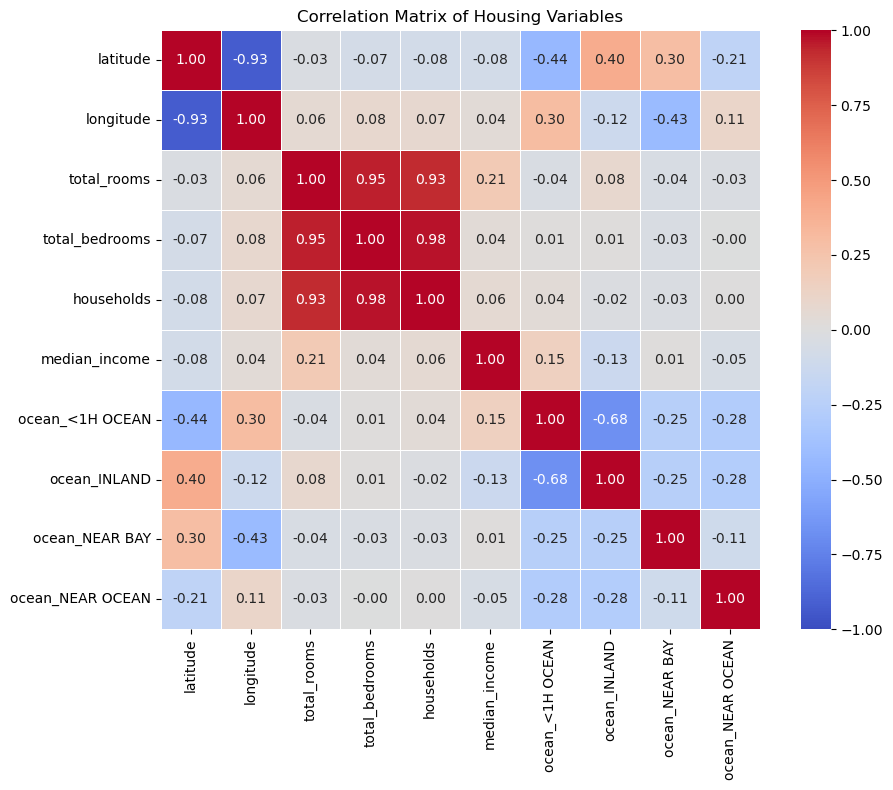

In [ ]:
# 3. Assumption - Check for Multicollinearity
# Tidak bisa mengecek. Sudah mencoba berberapa code untuk check multicollinearity lewat value VIF tetapi selalu error
# Karena itu, kita akan menggunakan alternatif untuk mengecek hubungan antara fitur-fitur, ya itu dengan menggunakan correlation matrix

corr_matrix = df[['latitude', 'longitude', 'total_rooms', 'total_bedrooms', 'households', 
          'median_income', 'ocean_<1H OCEAN', 'ocean_INLAND', 
          'ocean_NEAR BAY', 'ocean_NEAR OCEAN']].corr()

print("Correlation Matrix:")
print(corr_matrix.round(2)) 

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
           annot=True,
           fmt=".2f",
           cmap='coolwarm',
           vmin=-1,
           vmax=1,
           linewidths=0.5,
           square=True)  
plt.title("Correlation Matrix of Housing Variables")
plt.tight_layout()
plt.show()

# Ketiga variabel ini (total_bedrooms, total_rooms, households) memiliki korelasi yang sangat tinggi.
# Sehingga kita akan menggunakan hanya satu variabel dari tiga variabel ini untuk menjelaskan efek kepada variabel target, ya itu 'household'

In [ ]:
### Drop fitur 'total_bedrooms' & 'total_rooms' karena multicollinearity
df.drop(columns=['total_bedrooms', 'total_rooms'], inplace=True)
df.head()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,ocean_<1H OCEAN,ocean_INLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
7,-122.25,37.84,52.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,False,False,True,False
8,-122.26,37.84,42.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,False,False,True,False
9,-122.25,37.84,52.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,False,False,True,False
11,-122.26,37.85,52.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,False,False,True,False
12,-122.26,37.85,52.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,False,False,True,False


Correlation Matrix:
                  latitude  longitude  households  median_income  \
latitude              1.00      -0.93       -0.08          -0.08   
longitude            -0.93       1.00        0.07           0.04   
households           -0.08       0.07        1.00           0.06   
median_income        -0.08       0.04        0.06           1.00   
ocean_<1H OCEAN      -0.44       0.30        0.04           0.15   
ocean_INLAND          0.40      -0.12       -0.02          -0.13   
ocean_NEAR BAY        0.30      -0.43       -0.03           0.01   
ocean_NEAR OCEAN     -0.21       0.11        0.00          -0.05   

                  ocean_<1H OCEAN  ocean_INLAND  ocean_NEAR BAY  \
latitude                    -0.44          0.40            0.30   
longitude                    0.30         -0.12           -0.43   
households                   0.04         -0.02           -0.03   
median_income                0.15         -0.13            0.01   
ocean_<1H OCEAN              1.0

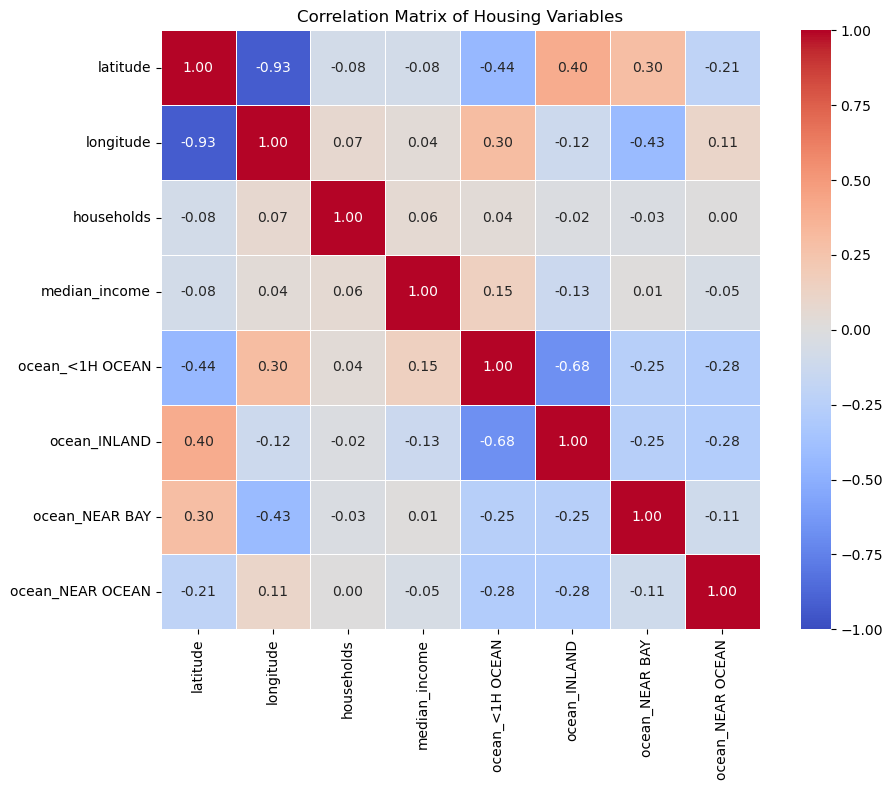

In [ ]:
## Multicollinearity second check

corr_matrix = df[['latitude', 'longitude', 'households', 
          'median_income', 'ocean_<1H OCEAN', 'ocean_INLAND', 
          'ocean_NEAR BAY', 'ocean_NEAR OCEAN']].corr()

print("Correlation Matrix:")
print(corr_matrix.round(2)) 

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
           annot=True,
           fmt=".2f",
           cmap='coolwarm',
           vmin=-1,
           vmax=1,
           linewidths=0.5,
           square=True)  
plt.title("Correlation Matrix of Housing Variables")
plt.tight_layout()
plt.show()

In [ ]:
# Multiple Regression

X = df[['latitude', 'longitude', 'households', 
          'median_income', 'ocean_<1H OCEAN', 'ocean_INLAND', 
          'ocean_NEAR BAY', 'ocean_NEAR OCEAN']]
y = df['median_house_value']

X = add_constant(X)  # Add a constant term to the predictor
X = X.drop(columns=['ocean_<1H OCEAN'])  # Drop one dummy variable to avoid multicollinearity

# Display basic info about features
print("\nFeature summary:")
print(X.info())

# Display target variable distribution
print("\nTarget variable distribution:")
print(y.describe())


Feature summary:
<class 'pandas.core.frame.DataFrame'>
Index: 15420 entries, 7 to 20607
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             15420 non-null  float64
 1   latitude          15420 non-null  float64
 2   longitude         15420 non-null  float64
 3   households        15420 non-null  float64
 4   median_income     15420 non-null  float64
 5   ocean_INLAND      15420 non-null  bool   
 6   ocean_NEAR BAY    15420 non-null  bool   
 7   ocean_NEAR OCEAN  15420 non-null  bool   
dtypes: bool(3), float64(5)
memory usage: 1.3 MB
None

Target variable distribution:
count     15420.000000
mean     151598.858366
std       57375.218153
min       14999.000000
25%      103600.000000
50%      151700.000000
75%      195200.000000
max      264100.000000
Name: median_house_value, dtype: float64



Model Evaluation:
Mean Squared Error (MSE): 1482714692.2426
Root Mean Squared Error (RMSE): 38506.0345
Mean Absolute Error (MAE): 30209.6156
R-squared (R²): 0.5634

Feature Coefficients:
            Feature   Coefficient
4     median_income  27900.943820
3        households   4861.013633
0             const      0.000000
7  ocean_NEAR OCEAN  -2439.510270
6    ocean_NEAR BAY  -3498.526827
5      ocean_INLAND -21159.294154
1          latitude -26552.180476
2         longitude -26904.654995


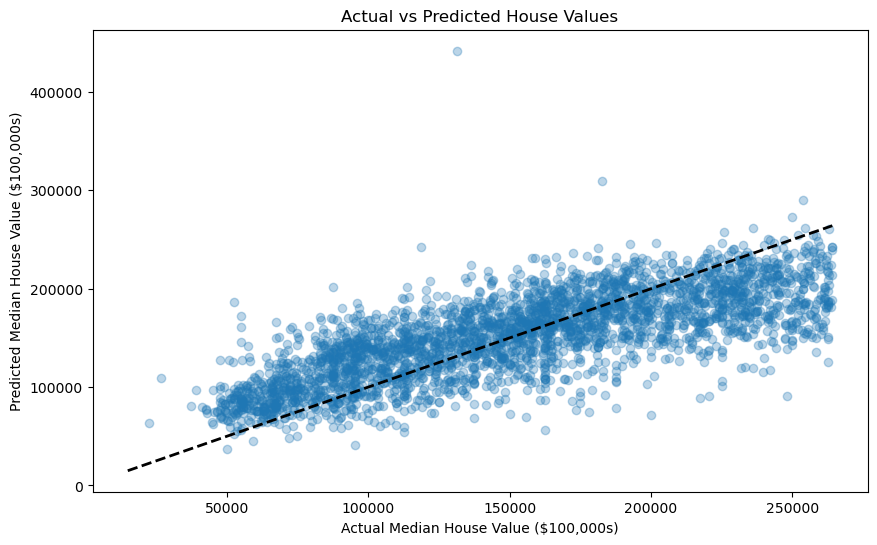

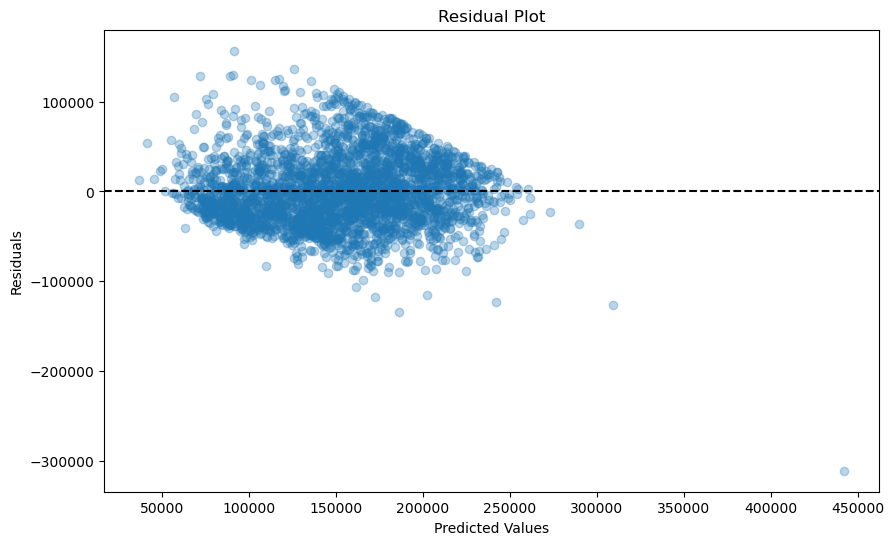

<Figure size 1000x600 with 0 Axes>

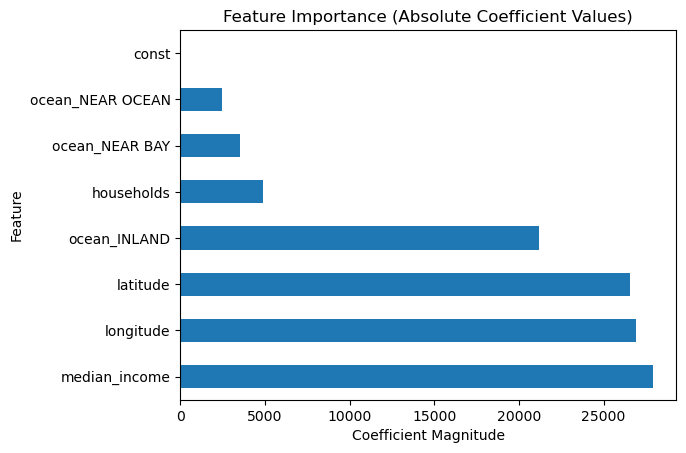

In [ ]:
# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create a pipeline that scales the data then runs linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', LinearRegression())  # Multiple linear regression
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = pipeline.score(X_test, y_test)  # R-squared score

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Display coefficients (feature importance)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': pipeline.named_steps['regressor'].coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Median House Value ($100,000s)')
plt.ylabel('Predicted Median House Value ($100,000s)')
plt.title('Actual vs Predicted House Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Feature importance plot (absolute coefficient values)
plt.figure(figsize=(10, 6))
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients.sort_values('Abs_Coefficient', ascending=False).plot(
    kind='barh', x='Feature', y='Abs_Coefficient', legend=False)
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.xlabel('Coefficient Magnitude')
plt.show()


Evaluation Metrics:
MAE: 29885.14
MSE: 1463733627.71
RMSE: 38258.77
R-squared: 0.5690
Adjusted R-squared: 0.5676

Cross-Validation Results:
RMSE scores for each fold: [38258.77190545 36966.96874398 37901.73021678 38549.20851779
 36953.06681374]
Mean RMSE: 37725.95
Standard deviation: 658.17

Normality Tests:
Shapiro-Wilk Test: p-value = 0.0000

Homoscedasticity Tests:
Breusch-Pagan Test: p-value = 0.0000


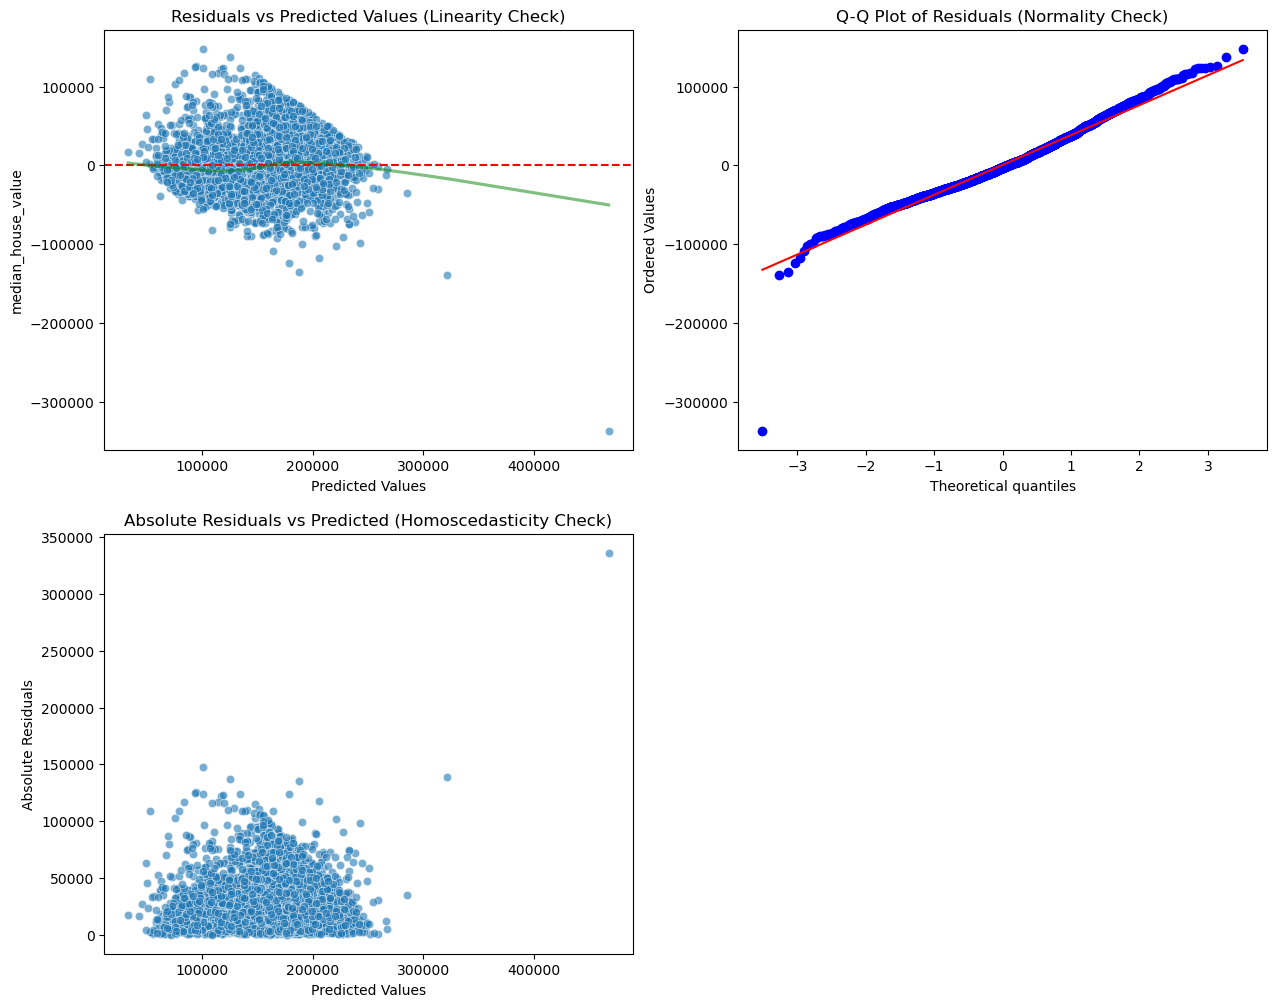

In [ ]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Make predictions
y_pred = model.predict(X_test)

# 7. Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("\nEvaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

# 8. Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("\nCross-Validation Results:")
print(f"RMSE scores for each fold: {cv_rmse_scores}")
print(f"Mean RMSE: {cv_rmse_scores.mean():.2f}")
print(f"Standard deviation: {cv_rmse_scores.std():.2f}")

# 9. Check regression assumptions
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.regression.linear_model import OLS

def check_regression_assumptions(X_train, y_train, X_test, y_test, y_pred):
    """
    Check regression assumptions with comprehensive diagnostics
    
    Parameters:
    X_train, y_train: Training data
    X_test, y_test: Test data
    y_pred: Predicted values for test set
    """
    
    residuals = y_test - y_pred
    
    # Create figure for all plots
    plt.figure(figsize=(15, 12))
    
    # 1. Linearity: Residuals vs Predicted Values
    plt.subplot(2, 2, 1)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals vs Predicted Values (Linearity Check)')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    
    # Add LOWESS smoother to help identify patterns
    sns.regplot(x=y_pred, y=residuals, lowess=True, 
                scatter=False, color='green', line_kws={'alpha': 0.5})
    
    # 2. Normality: Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Residuals (Normality Check)')
    
    # Shapiro-Wilk test for normality
    shapiro_test = stats.shapiro(residuals)
    print(f"\nNormality Tests:")
    print(f"Shapiro-Wilk Test: p-value = {shapiro_test.pvalue:.4f}")
    if shapiro_test.pvalue < 0.05:
        print("Warning: Residuals may not be normally distributed (p < 0.05)")
    
    # 3. Homoscedasticity
    plt.subplot(2, 2, 3)
    sns.scatterplot(x=y_pred, y=np.abs(residuals), alpha=0.6)
    plt.title('Absolute Residuals vs Predicted (Homoscedasticity Check)')
    plt.xlabel('Predicted Values')
    plt.ylabel('Absolute Residuals')
    
    # Breusch-Pagan test for heteroscedasticity
    bp_test = het_breuschpagan(residuals, sm.add_constant(X_test))
    print(f"\nHomoscedasticity Tests:")
    print(f"Breusch-Pagan Test: p-value = {bp_test[1]:.4f}")
    if bp_test[1] < 0.05:
        print("Warning: Possible heteroscedasticity detected (p < 0.05)")

check_regression_assumptions(X_train, y_train, X_test, y_test, y_pred)

In [ ]:
### Check average, min and max values for median_house_value

average_value = df['median_house_value'].mean()
print(f"The average median house value is: {average_value}")

min_value = df['median_house_value'].min()
max_value = df['median_house_value'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

The average median house value is: 151598.85836575876
Minimum value: 14999.0
Maximum value: 264100.0


# Conclusion

Berdasarkan hasil evaluasi model regresi yang telah dilakukan, berikut adalah kesimpulan utamanya:

**Kinerja Model Secara Keseluruhan**

Model ini mampu menjelaskan 56.34% variasi dalam harga rumah median (R² = 0.5634). Ini menunjukkan bahwa model memiliki prediksi yang cukup baik, meskipun masih ada faktor lain di luar variabel yang digunakan yang memengaruhi harga rumah. Meskipun berberapa asumsi dilanggar, kekuatan model tetap dalam jangka moderat sesuai dengan R²

**Error prediksi**

Rata-rata kesalahan absolut (MAE) adalah 30,209, artinya prediksi harga rumah meleset sekitar 30000 dari harga aktual. 
RMSE sebesar $38,506 menunjukkan bahwa ada beberapa prediksi dengan kesalahan yang lebih besar (karena RMSE lebih sensitif terhadap outlier).

**Pengaruh Variabel Prediktor**

*Faktor paling berpengaruh*

Pendapatan median (median_income) memiliki koefisien positif tertinggi (+$27,900 per unit kenaikan). Artinya, kenaikan pendapatan berhubungan kuat dengan kenaikan harga rumah.
Jumlah rumah tangga (households) juga berpengaruh positif (+$4,861), menunjukkan bahwa daerah dengan lebih banyak rumah tangga cenderung memiliki harga rumah lebih tinggi.

*Faktor negatif terkuat*

Lokasi di pedalaman (ocean_INLAND) mengurangi harga rumah rata-rata -$21,159 dibandingkan lokasi lain.
Koordinat geografis (latitude/longitude) memiliki koefisien negatif, mungkin mencerminkan pola spasial tertentu (misalnya, harga lebih rendah di area tertentu).
Lokasi dekat pantai:
Berada dekat teluk (NEAR BAY) atau samudera (NEAR OCEAN) mengurangi harga rumah dibandingkan lokasi "<1H OCEAN" (default), tetapi efeknya lebih kecil daripada lokasi pedalaman.

**Keterbatasan Model**

Error yang relatif tinggi (MAE > $30 ribu) menunjukkan bahwa model mungkin membutuhkan:
Variabel tambahan (misalnya: ukuran properti, usia bangunan, fasilitas umum).
Transformasi data (misalnya: logaritma pada harga rumah untuk mengurangi skewness).
R² yang moderat (56.34%) mengindikasikan bahwa hampir 44% variasi harga rumah belum dijelaskan oleh variabel-variabel ini.

# Recommendations

**Untuk meningkatkan akurasi**

Tambahkan data seperti: Jarak ke supermarket terdekat, jarak ke pusat kota, atau kualitas sekolah. Ini akan mengurangi efek dari missing variable bias, karena faktor-faktor tersebut sudah hampir pasti menjadi signifikan dalam penentuan harga properti. 

Pertimbangkan model non-linear atau algoritma machine learning lain (misalnya: Random Forest) jika hubungan antar variabel kompleks.

**Untuk interpretasi kebijakan**

Fokus pada peningkatan pendapatan masyarakat dan pengembangan infrastruktur di daerah pedalaman (ocean_INLAND) untuk potensi kenaikan harga properti.

**Untuk pembeli rumah**

Bagi calon pembeli rumah yang memprioritaskan perumahan yang memiliki rata-rata penghasilan tinggi, mereka juga harus mempersiapkan diri untuk membayar lebih tinggi dalam nilai properti. Secara lokasi, rumah-rumah yang berada di lokasi inland, dan secara umum berada di area barat - selatan - barat daya akan menjadi pilihan termurah. Sangat direkomendasikan ke calon pembeli rumah apabila mereka tidak memprioritaskan lokasi di dekat pantai. 

Dengan penyempurnaan lebih lanjut, model ini dapat menjadi alat yang lebih akurat untuk memprediksi harga rumah di pasar properti.